# Using Neural Networks

  * For this assignment, you must construct an appropriate neural network model for multiclass classification.
  * Points will be awarded for both the correctness of your implementation and the final accuracy of your model on the evaluation data.
    
> **Tasks are designed to allow room for creativity. Figuring out _exactly how_ you will solve the assignment is an important part of the task, and originality or ingenuity will also be assessed!**

Use `Markdown` cells to explain your process. Points will be deducted for lack of clarity.

## Data Source

 * The data source consists of `train.csv` and `evaluate.csv` files.
 * These are 32x32 pixel grayscale images derived in some way from the [Fashion MNIST dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * The `train.csv` file contains the training data.
 * The target (dependent) variable is named **label**.
 * The `evaluate.csv` file contains the test data without actual label values.

## Assignment Instructions (max 18 points)

**Assignment points**, for which you can earn **18 points** for thorough completion:
  * Load the data from the `train.csv` file into the notebook. Divide the data into subsets that will be used for training, model comparison, and final model performance prediction.
  * Conduct a basic data exploration and discuss your observations. Display some of the images as well.
  * Construct and train several variants of a feedforward neural network model. Within the computational possibilities:
      * Comment on the suitability of the given model for the task.
      * Experiment with different depths and sizes of layers.
      * Experiment with data standardization/normalization.
      * Experiment with different optimization methods.
      * Experiment with various regularization techniques.
      * Always properly comment on the obtained results.

  * Construct a convolutional neural network model. Within the computational possibilities:
      * Comment on the suitability of the given model for the task.
      * Experiment with different depths and sizes of layers.
      * Experiment with data standardization/normalization.
      * Experiment with different optimization methods.
      * Experiment with various regularization techniques.
      * Always properly comment on the obtained results.
    
  * From all the tested options, choose the final model and estimate the accuracy you can expect on new data that you have not had access to before.
  
  * Finally, load the evaluation data from the `evaluate.csv` file. Use the final model to calculate predictions for this data (the target variable is not included). Create a `results.csv` file, in which the obtained predictions are saved in the **label** column and the identifiers in the **ID** column. Submit this file as well (save it in the project alongside the notebook).
   
   * Sample of the first few lines of the `results.csv` file:
  
ID,label

0,0

1,1


## Evaluation Part (max 7 points)
You can earn up to **7 points** for the accuracy of your submitted predictions for the evaluation set.

Denoting $A$ as the accuracy you achieved, rounded to 2 decimal places, the final points accumulate according to the following rules:
* if $A \geq 0.80$ you receive +1 point
* if $A \geq 0.83$ you receive +1 point
* if $A \geq 0.86$ you receive +1 point
* if $A \geq 0.87$ you receive +1 point
* if $A \geq 0.88$ you receive +1 point
* if $A \geq 0.89$ you receive +1 point
* if $A \geq 0.90$ you receive +1 point

**Example:** If your accuracy is 0.856, then A = 0.86 and you will receive 3 points.


In [1]:
import pandas as pd
import time
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:100% !important; }</style>"))

# Load train set
train_data = pd.read_csv('train.csv')
train_data.head(5)

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5


In [2]:
# Unique labels 
set(train_data['label'].unique())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [3]:
missing_values = train_data.isnull().sum()

# Check if there are any missing values at all
if missing_values.any():
    # Print the columns with missing values and their counts
    print("Missing values found in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [4]:
min_values = train_data.min()
max_values = train_data.max()

# Find the lowest and highest value across the entire DataFrame
lowest_value = min_values.min()
highest_value = max_values.max()

# Display results
print(f"The lowest value across all pixels is: {lowest_value}")
print(f"The highest value across all pixels is: {highest_value}")

The lowest value across all pixels is: 0
The highest value across all pixels is: 255


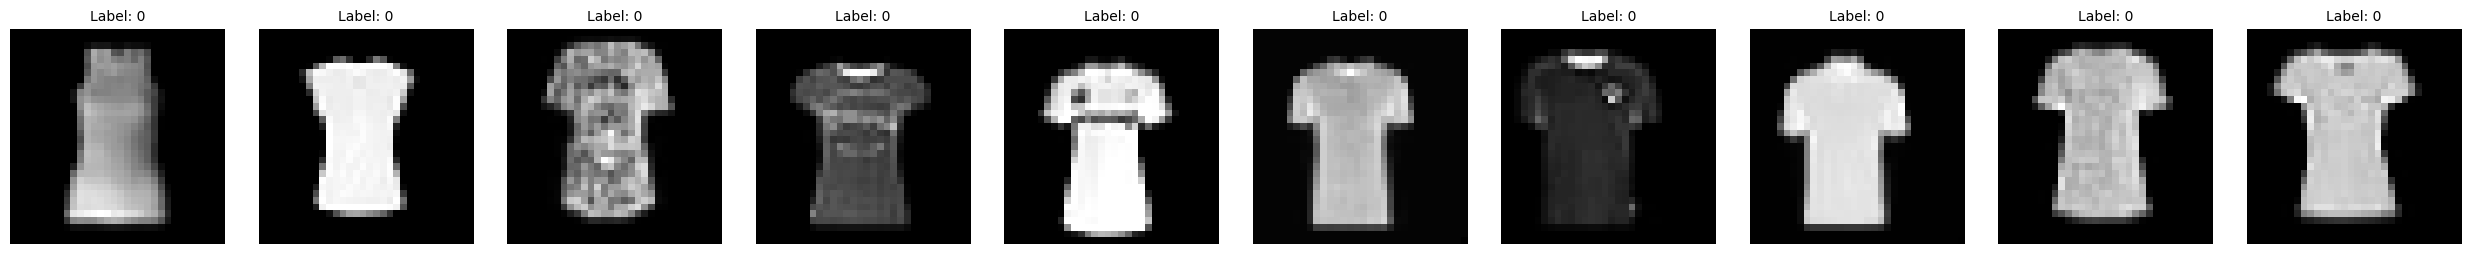

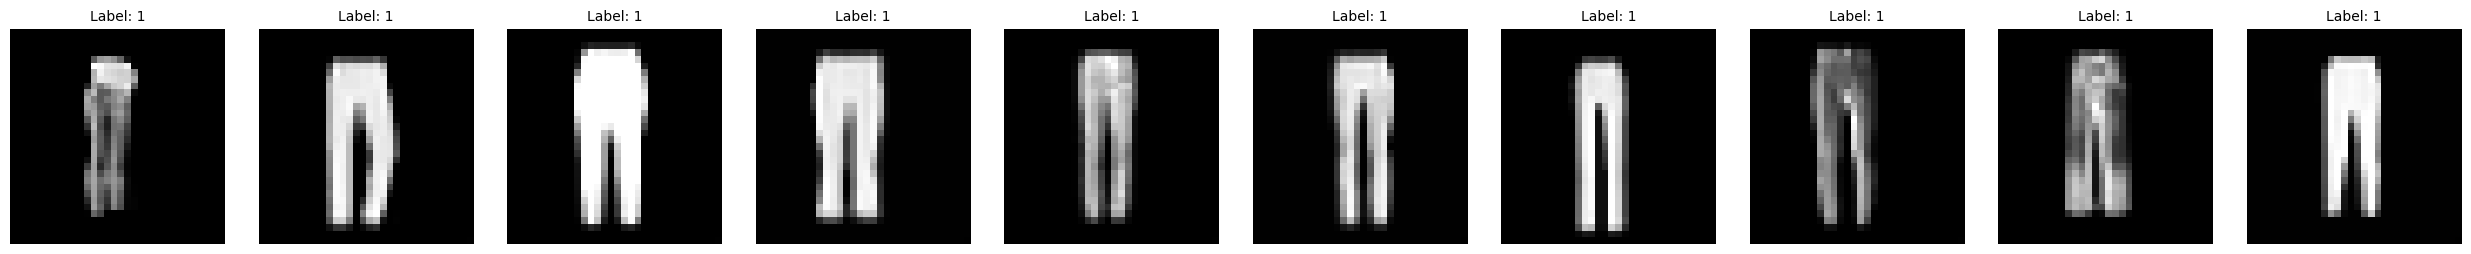

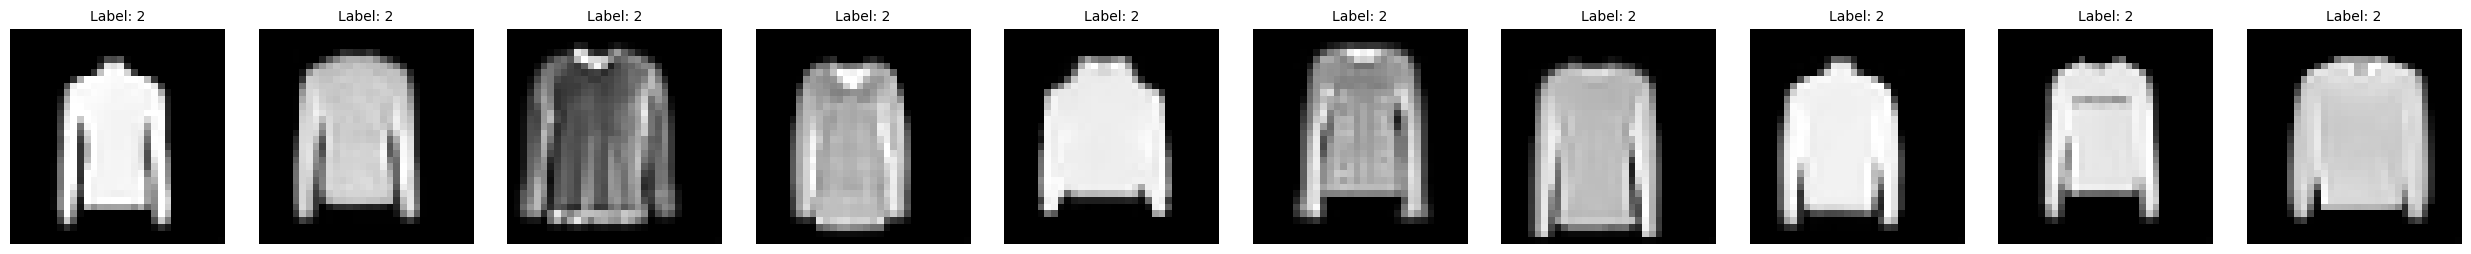

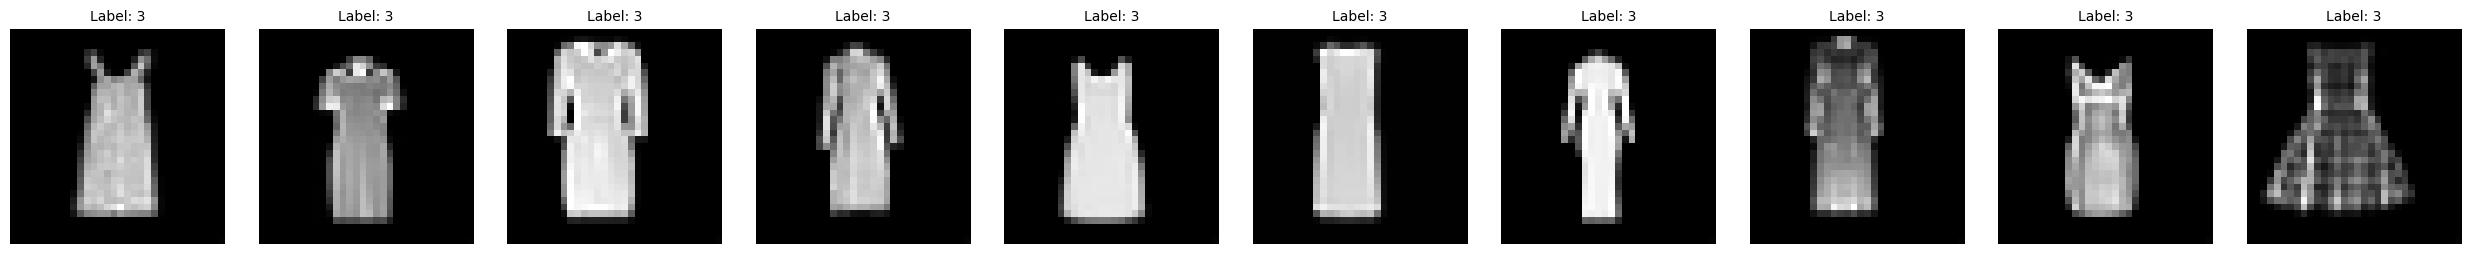

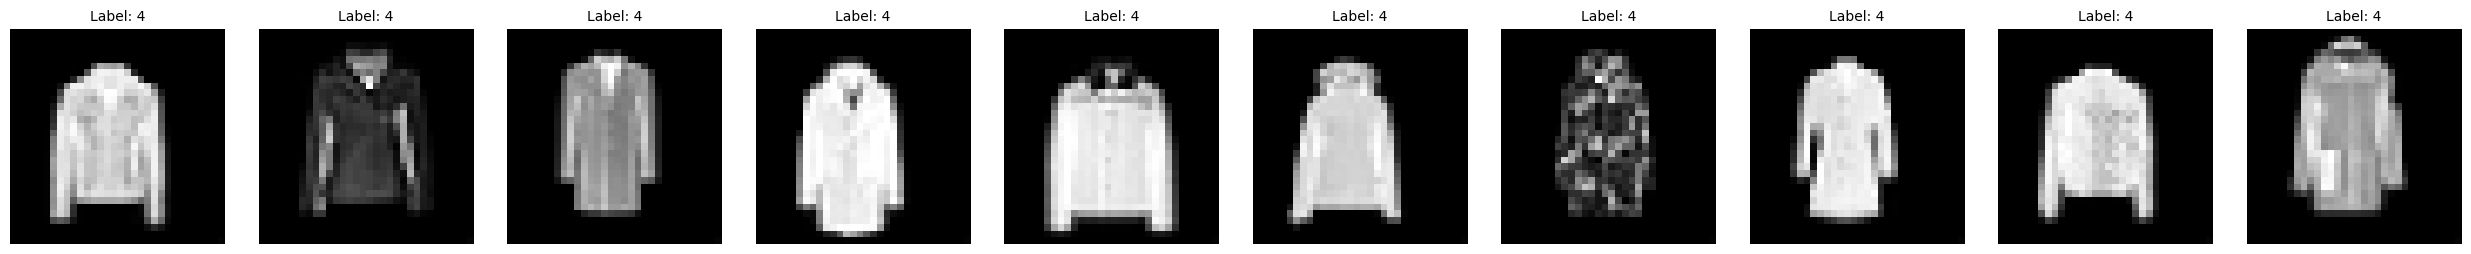

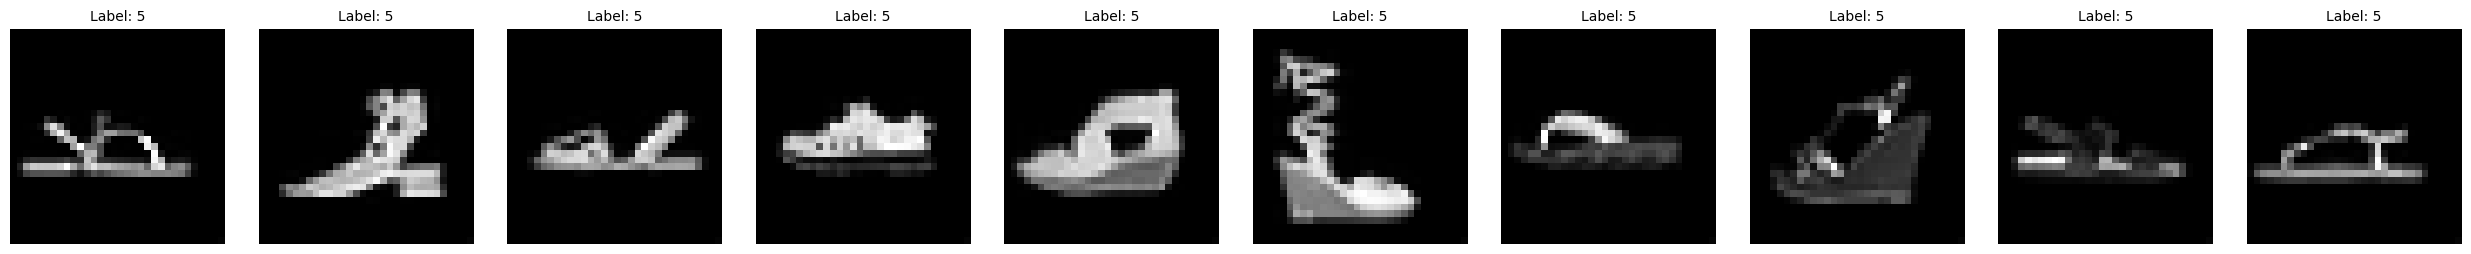

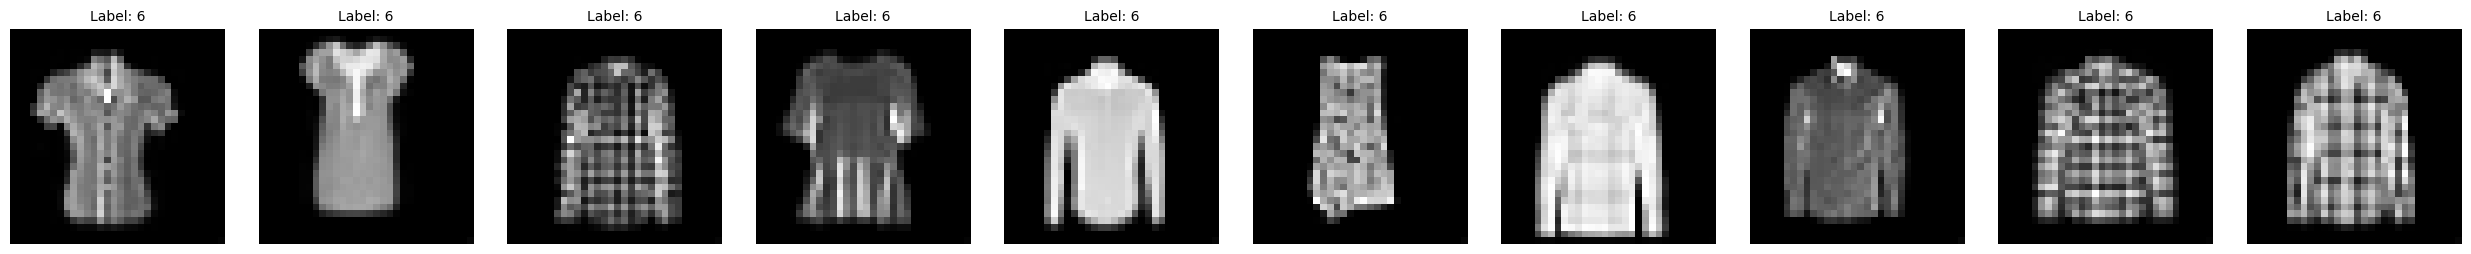

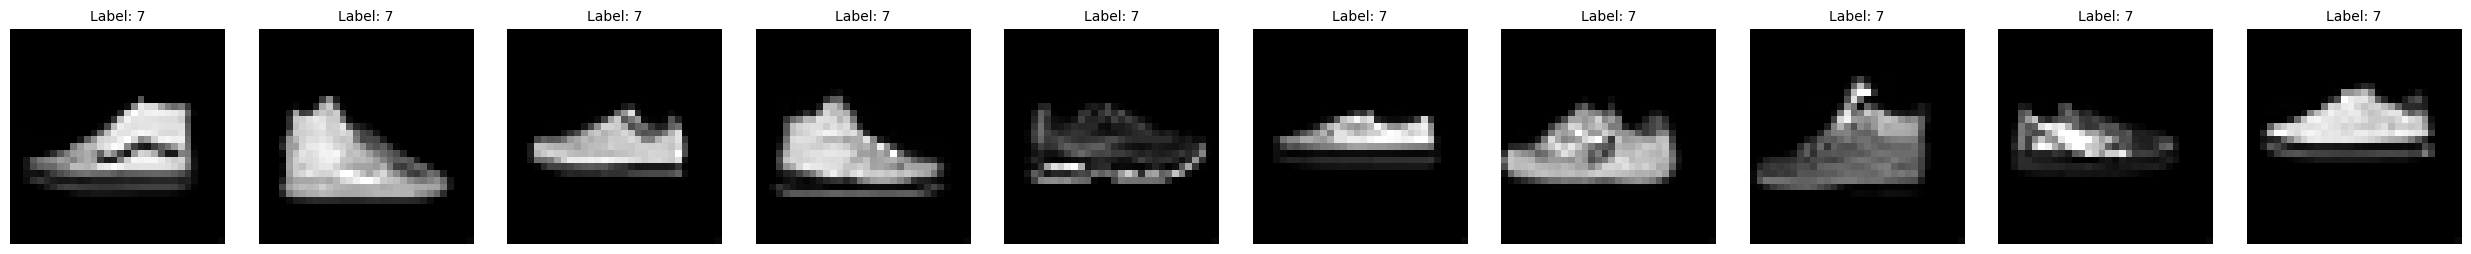

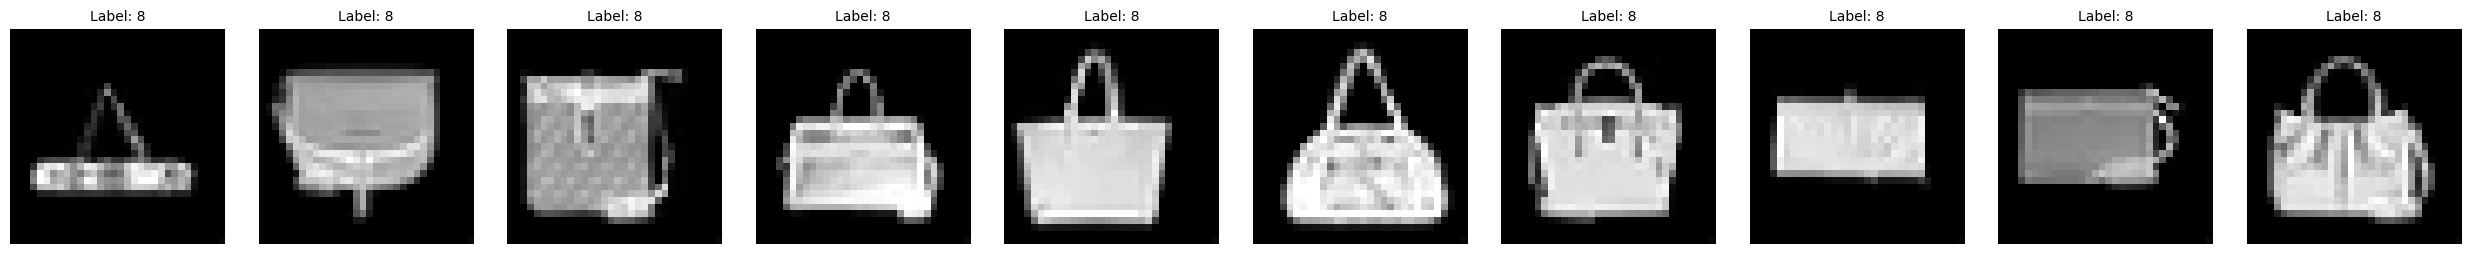

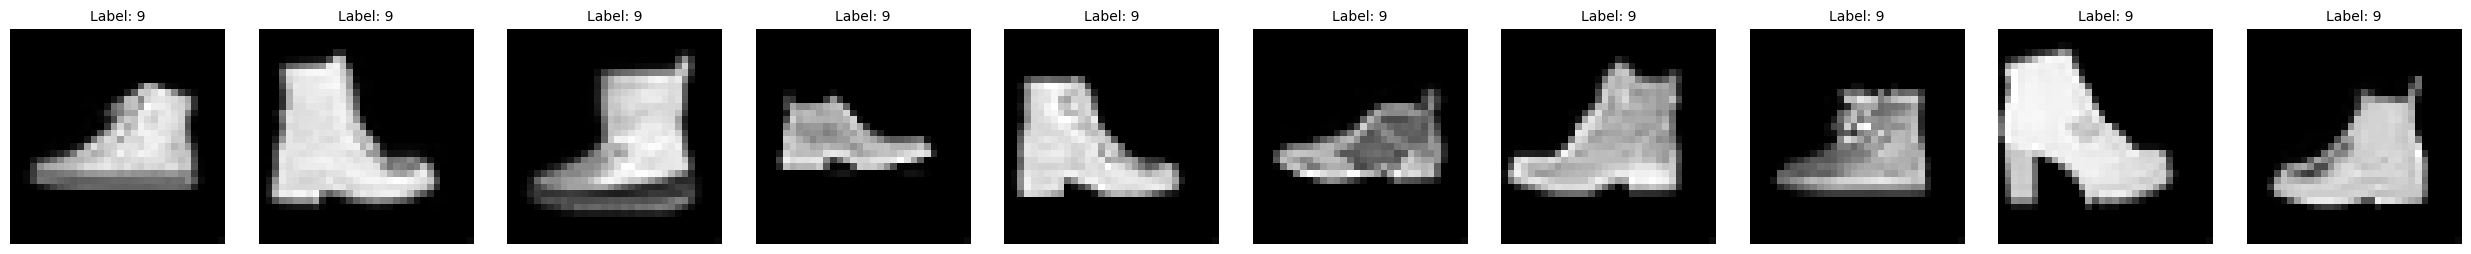

In [5]:
def draw_images_with_labels(data, num_images=40):
    """
    Draws the first `num_images` images contained in `data` with labels.
    
    Parameters:
    - data: A pandas DataFrame where each row is an image with pixel intensities and the first
            column is the label.
    - num_images: The number of images to draw.
    """
    # Extract labels from the first column
    labels = data.iloc[:, 0] if 'label' not in data.columns else data['label']
    
    # Drop the 'label' column to prepare data for visualization
    data_for_visualization = np.array(data.drop(data.columns[0], axis=1))
    
    # Number of images to display
    num_images = min(num_images, data_for_visualization.shape[0])
    
    # Set up the matplotlib figure and axes, based on the number of images
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2.5, 2.5))
    if num_images == 1:
        axes = [axes]  # Make sure axes is iterable for the case of a single image
    
    for i, ax in enumerate(axes):
        # Reshape the row into 28x28 to get the image
        img = data_for_visualization[i].reshape(32, 32)
        
        # Display an image
        ax.imshow(img, cmap='gray', interpolation='none')
        ax.axis('off')
        
        # Display the label near the image
        ax.set_title(f'Label: {labels.iloc[i]}', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
# Assuming train_data is a pandas DataFrame with your images and labels
for i in set(train_data['label'].unique()):
    data = train_data[train_data['label'] == i]
    draw_images_with_labels(data, num_images=10)

0 - t-shirt

1 - trousers

2 - sweater

3 - dress

4 - seems to be coat

5 - sandals

6 - blouse

7 - sneakers

8 - handbag

9 - boots

In [6]:
import torch
from torch.utils.data import DataLoader, TensorDataset

source_images = train_data.drop('label', axis=1).values / 255.0 # Normalize data
source_labels = train_data['label'].values

source_images = source_images.reshape(-1,1,32,32) # reshape images

print(source_images.shape, source_labels.shape)

# Convert to PyTorch tensors
dataset = TensorDataset(torch.tensor(source_images, dtype=torch.float), torch.tensor(source_labels, dtype=torch.long))

print(f"Amount of elements in the dataset: {len(dataset)}")

# Set a random seed for reproducibility
generator1 = torch.Generator().manual_seed(42)

# Calculate sizes for splits: 60% for training, 24% for validation, 16% for testing
train_size = int(0.6 * len(dataset))
val_size = int(0.24 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split the dataset into training and remainder (validation + test)
train_data, remainder = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size], generator=generator1)

# Split the remainder into validation and testing
val_data, test_data = torch.utils.data.random_split(remainder, [val_size, test_size], generator=generator1)

print("The length of train data is:", len(train_data))
print("The length of val data is:", len(val_data))
print("The length of test data is:", len(test_data))

(52500, 1, 32, 32) (52500,)
Amount of elements in the dataset: 52500
The length of train data is: 31500
The length of val data is: 12600
The length of test data is: 8400


In [7]:
# Create a DataLoader for the training data:
training_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Create a DataLoader for the validation data:
validation_loader = DataLoader(val_data, batch_size=128, shuffle=False)

# Create a DataLoader for the testing data:
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

## Techniques Used in Training MyNet

- **Neural Network Architecture**: A simple fully connected network (`MyNet`) with one hidden layer.
- **Activation Function**: ReLU, used to introduce non-linearity, allowing the model to learn more complex functions.
- **Optimizer**: Adam, a widely-used optimizer that combines the best properties of the AdaGrad and RMSProp algorithms to handle sparse gradients on noisy problems.
- **Loss Function**: Cross-Entropy Loss, commonly used for classification tasks.
- **Backpropagation**: Used during training to minimize the loss by adjusting the weights of the network.
- **Early Stopping**: A form of regularization used to avoid overfitting by stopping training if the validation loss does not improve after a specified number of epochs.

Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 714.69it/s]


EPOCH 1: Train Loss: 1.0050, Val Loss: 0.7743, Val Accuracy: 0.7197
Saved best model at epoch 1


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 715.62it/s]


EPOCH 2: Train Loss: 0.7092, Val Loss: 0.7036, Val Accuracy: 0.7533
Saved best model at epoch 2


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 806.10it/s]


EPOCH 3: Train Loss: 0.6572, Val Loss: 0.6703, Val Accuracy: 0.7602
Saved best model at epoch 3


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 742.97it/s]


EPOCH 4: Train Loss: 0.6307, Val Loss: 0.6651, Val Accuracy: 0.7664
Saved best model at epoch 4


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 796.65it/s]


EPOCH 5: Train Loss: 0.6141, Val Loss: 0.6490, Val Accuracy: 0.7740
Saved best model at epoch 5


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 773.51it/s]


EPOCH 6: Train Loss: 0.5991, Val Loss: 0.6411, Val Accuracy: 0.7744
Saved best model at epoch 6


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 789.78it/s]


EPOCH 7: Train Loss: 0.5871, Val Loss: 0.6293, Val Accuracy: 0.7792
Saved best model at epoch 7


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 844.53it/s]


EPOCH 8: Train Loss: 0.5793, Val Loss: 0.6182, Val Accuracy: 0.7816
Saved best model at epoch 8


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 802.97it/s]


EPOCH 9: Train Loss: 0.5708, Val Loss: 0.6178, Val Accuracy: 0.7834
Saved best model at epoch 9


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 778.92it/s]


EPOCH 10: Train Loss: 0.5636, Val Loss: 0.6098, Val Accuracy: 0.7853
Saved best model at epoch 10


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 815.88it/s]


EPOCH 11: Train Loss: 0.5554, Val Loss: 0.6294, Val Accuracy: 0.7813
No improvement


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 828.28it/s]


EPOCH 12: Train Loss: 0.5498, Val Loss: 0.6070, Val Accuracy: 0.7884
Saved best model at epoch 12


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 820.01it/s]


EPOCH 13: Train Loss: 0.5439, Val Loss: 0.5987, Val Accuracy: 0.7871
Saved best model at epoch 13


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 788.98it/s]


EPOCH 14: Train Loss: 0.5377, Val Loss: 0.5973, Val Accuracy: 0.7883
Saved best model at epoch 14


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 816.74it/s]


EPOCH 15: Train Loss: 0.5312, Val Loss: 0.6070, Val Accuracy: 0.7887
No improvement


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 798.89it/s]


EPOCH 16: Train Loss: 0.5288, Val Loss: 0.5922, Val Accuracy: 0.7906
Saved best model at epoch 16


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 808.88it/s]


EPOCH 17: Train Loss: 0.5253, Val Loss: 0.6046, Val Accuracy: 0.7926
No improvement


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 820.60it/s]


EPOCH 18: Train Loss: 0.5196, Val Loss: 0.5866, Val Accuracy: 0.7925
Saved best model at epoch 18


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 818.43it/s]


EPOCH 19: Train Loss: 0.5163, Val Loss: 0.5965, Val Accuracy: 0.7921
No improvement


Validation Progress: 100%|██████████| 99/99 [00:00<00:00, 818.93it/s]


EPOCH 20: Train Loss: 0.5124, Val Loss: 0.5983, Val Accuracy: 0.7904
No improvement
The best model is Epochs = 18


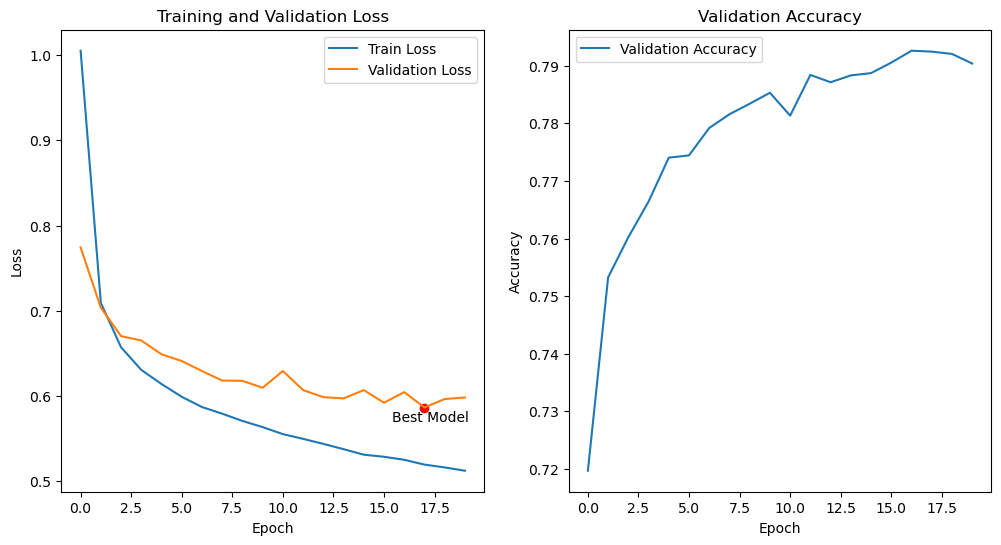

In [8]:
from torch import nn
import torch.nn.functional as F
from torch.optim import Adam, lr_scheduler
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

class MyNet(nn.Module):
    def __init__(self, input_dim=32*32, hidden_dim=16, output_dim=10):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fco = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(x))
        x = self.fco(x)
        return x

def train_one_epoch(model, data_loader, optimizer, loss_fn):
    '''
    Trains the model for one epoch through all batches of the training data,
    using backpropagation and gradient descent (Adam optimizer) to minimize the cross-entropy loss.
    '''
    model.train()
    total_loss = 0
    progress_bar = tqdm(data_loader, desc="Training Progress", total=len(data_loader))
    for inputs, labels in progress_bar:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * inputs.size(0)
        progress_bar.set_postfix(loss=loss.item())
    return total_loss / len(data_loader.dataset)

def validate(model, data_loader, loss_fn):
    '''
    Evaluates the model on the validation dataset to compute loss and accuracy,
    ensuring the model generalizes well beyond the training data.
    '''
    model.eval()
    total_loss, correct = 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc="Validation Progress", total=len(data_loader)):
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
    return total_loss / len(data_loader.dataset), correct / len(data_loader.dataset)

def train_network(model, best_model_path, training_loader, validation_loader, epochs, early_stopping_patience=5):
    '''
    Orchestrates the training and validation processes for a given neural network model over a specified number of epochs.
    It integrates early stopping to prevent overfitting and saves the best model based on validation loss.
    '''
    optimizer = Adam(model.parameters())
    loss_fn = nn.CrossEntropyLoss()
    train_losses, val_losses, val_accuracies = [], [], []

    best_val_loss = float('inf')
    best_epoch = 0
    epochs_no_improve = 0

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, training_loader, optimizer, loss_fn)
        val_loss, val_accuracy = validate(model, validation_loader, loss_fn)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'EPOCH {epoch + 1}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            torch.save(model.state_dict(), f'{best_model_path}.pth')
            epochs_no_improve = 0
            print("Saved best model at epoch", best_epoch + 1)
        else:
            epochs_no_improve += 1
            print("No improvement")

        if epochs_no_improve >= early_stopping_patience:
            print("Early stopping")
            break

    model.load_state_dict(torch.load(f'{best_model_path}.pth'))
    print(f"The best model is Epochs = {best_epoch+1}")

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.scatter(best_epoch, best_val_loss, color='red')
    plt.annotate('Best Model', (best_epoch+1, best_val_loss), textcoords="offset points", xytext=(-10,-10), ha='center')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


model = MyNet()

train_network(model=model,
              best_model_path='MyNet_best_model',
              training_loader=training_loader,
              validation_loader=validation_loader,
              epochs=20,
              early_stopping_patience=3)

## MyConvNet1

- **Neural Network Architecture**: `MyConvNet1`, a simple convolutional neural network (CNN) suitable for image data.
- **Convolutional Layers**: Two layers that use learned filters to capture spatial hierarchies in the input data:
  - The first convolutional layer has 32 filters, each of size 3x3, with padding to preserve the dimensionality of the input.
  - The second convolutional layer reduces the depth to 16 filters, also of size 3x3.
- **Pooling Layers**: Max pooling is applied after each convolutional layer to reduce the spatial dimensions, helping to decrease the computational complexity and control overfitting.
- **Activation Function**: ReLU, used after each convolutional layer to introduce non-linearities into the model, enabling it to capture more complex patterns.
- **Fully Connected Layer (Output Layer)**: Transforms the final feature map into class scores, with the network outputting 10 classes.
- **Optimizer**: Adam, a widely-used optimizer that combines the best properties of the AdaGrad and RMSProp algorithms to handle sparse gradients on noisy problems.
- **Flattening**: The output from the final pooling layer is flattened into a vector before being fed into the fully connected layer.
- **Loss Function**: Cross-Entropy Loss, a standard choice for multi-class classification tasks.
- **Early Stopping**: Implemented to prevent overfitting by halting training if the validation performance does not improve after a set number of epochs.

Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 69.20it/s]


EPOCH 1: Train Loss: 0.7601, Val Loss: 0.5915, Val Accuracy: 0.7813
Saved best model at epoch 1


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 70.38it/s]


EPOCH 2: Train Loss: 0.5247, Val Loss: 0.5119, Val Accuracy: 0.8161
Saved best model at epoch 2


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 70.25it/s]


EPOCH 3: Train Loss: 0.4572, Val Loss: 0.4486, Val Accuracy: 0.8433
Saved best model at epoch 3


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 66.97it/s]


EPOCH 4: Train Loss: 0.4211, Val Loss: 0.4443, Val Accuracy: 0.8418
Saved best model at epoch 4


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 66.58it/s]


EPOCH 5: Train Loss: 0.4002, Val Loss: 0.4491, Val Accuracy: 0.8383
No improvement


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 70.20it/s]


EPOCH 6: Train Loss: 0.3774, Val Loss: 0.3931, Val Accuracy: 0.8615
Saved best model at epoch 6


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 70.11it/s]


EPOCH 7: Train Loss: 0.3619, Val Loss: 0.4140, Val Accuracy: 0.8531
No improvement


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 70.23it/s]


EPOCH 8: Train Loss: 0.3464, Val Loss: 0.3948, Val Accuracy: 0.8587
No improvement


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 64.62it/s]


EPOCH 9: Train Loss: 0.3360, Val Loss: 0.3856, Val Accuracy: 0.8602
Saved best model at epoch 9


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 68.50it/s]


EPOCH 10: Train Loss: 0.3250, Val Loss: 0.3754, Val Accuracy: 0.8640
Saved best model at epoch 10


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 71.19it/s]


EPOCH 11: Train Loss: 0.3162, Val Loss: 0.3657, Val Accuracy: 0.8705
Saved best model at epoch 11


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 71.83it/s]


EPOCH 12: Train Loss: 0.3097, Val Loss: 0.3684, Val Accuracy: 0.8649
No improvement


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 71.11it/s]


EPOCH 13: Train Loss: 0.2983, Val Loss: 0.3545, Val Accuracy: 0.8744
Saved best model at epoch 13


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 70.22it/s]


EPOCH 14: Train Loss: 0.2941, Val Loss: 0.3626, Val Accuracy: 0.8727
No improvement


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 58.86it/s]


EPOCH 15: Train Loss: 0.2886, Val Loss: 0.3708, Val Accuracy: 0.8670
No improvement


Validation Progress: 100%|██████████| 99/99 [00:01<00:00, 65.19it/s]


EPOCH 16: Train Loss: 0.2815, Val Loss: 0.3598, Val Accuracy: 0.8738
No improvement
Early stopping
The best model is Epochs = 13


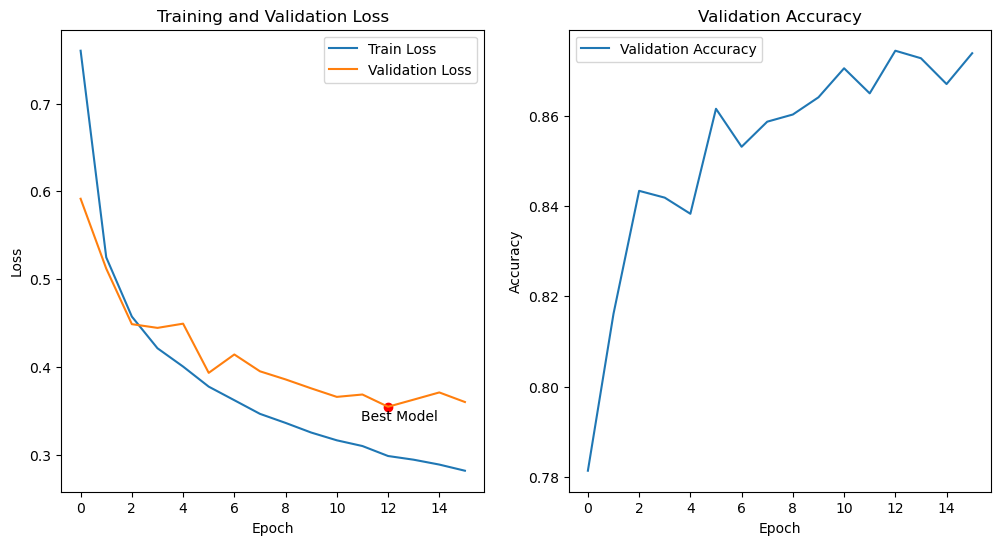

In [9]:
class MyConvNet1(nn.Module):
    def __init__(self):
        super(MyConvNet1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 16, 3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fco = nn.Linear(16 * 8 * 8, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim=1)
        x = self.fco(x)
        return x


# Example usage
model = MyConvNet1()
# Assuming training_loader and validation_loader are DataLoader instances set up elsewhere
train_network(model=model,
              best_model_path='MyConvNet1_best_model',
              training_loader=training_loader,
              validation_loader=validation_loader,
              epochs=20,
              early_stopping_patience=3)

## MyConvNet2

- **Neural Network Architecture**: `MyConvNet2`, a convolutional neural network (CNN) designed for processing image data.
- **Convolutional Layers**: Utilizes two convolutional layers to extract spatial features from images:
  - The first layer features 32 filters of size 3x3, using padding to maintain spatial dimensions.
  - The second layer increases complexity with 64 filters of the same size, enhancing the network’s ability to capture detailed features.
- **Batch Normalization**: Applied after each convolutional operation but before activation to normalize the activations, helping to stabilize and accelerate training.
- **Pooling Layers**: Max pooling layers follow each batch normalization step, reducing the spatial dimensions to decrease computational load and help the model focus on essential features.
- **Activation Function**: ReLU, employed to introduce non-linear processing, crucial for learning complex patterns in data.
- **Dropout**: Integrated at two points to mitigate overfitting by randomly dropping units (with probabilities of 0.25 and 0.5) during the training process, which promotes the development of redundant pathways in the network, enhancing its robustness.
- **Fully Connected Layers**: Converts the processed feature maps into final output predictions, featuring a transition through a dense layer of 128 units before reaching the output layer of 10 classes.
- **Optimizer**: Adam, a widely-used optimizer that combines the best properties of the AdaGrad and RMSProp algorithms to handle sparse gradients on noisy problems.
- **Loss Function**: Cross-Entropy Loss, a standard choice for multi-class classification tasks.
- **Early Stopping**: Monitors validation loss and stops training if there is no improvement for a specified number of epochs, preventing overfitting.

Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 40.55it/s]


EPOCH 1: Train Loss: 0.7310, Val Loss: 0.4782, Val Accuracy: 0.8220
Saved best model at epoch 1


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 42.80it/s]


EPOCH 2: Train Loss: 0.5453, Val Loss: 0.4027, Val Accuracy: 0.8544
Saved best model at epoch 2


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 43.10it/s]


EPOCH 3: Train Loss: 0.4893, Val Loss: 0.3801, Val Accuracy: 0.8599
Saved best model at epoch 3


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 41.22it/s]


EPOCH 4: Train Loss: 0.4451, Val Loss: 0.3633, Val Accuracy: 0.8663
Saved best model at epoch 4


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 44.20it/s]


EPOCH 5: Train Loss: 0.4192, Val Loss: 0.3482, Val Accuracy: 0.8729
Saved best model at epoch 5


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 43.86it/s]


EPOCH 6: Train Loss: 0.3986, Val Loss: 0.3704, Val Accuracy: 0.8637
No improvement


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 41.41it/s]


EPOCH 7: Train Loss: 0.3784, Val Loss: 0.3301, Val Accuracy: 0.8819
Saved best model at epoch 7


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 43.39it/s]


EPOCH 8: Train Loss: 0.3652, Val Loss: 0.3281, Val Accuracy: 0.8828
Saved best model at epoch 8


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 43.42it/s]


EPOCH 9: Train Loss: 0.3479, Val Loss: 0.3243, Val Accuracy: 0.8810
Saved best model at epoch 9


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 41.82it/s]


EPOCH 10: Train Loss: 0.3345, Val Loss: 0.3143, Val Accuracy: 0.8871
Saved best model at epoch 10


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 43.51it/s]


EPOCH 11: Train Loss: 0.3253, Val Loss: 0.3047, Val Accuracy: 0.8892
Saved best model at epoch 11


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 40.45it/s]


EPOCH 12: Train Loss: 0.3108, Val Loss: 0.3126, Val Accuracy: 0.8883
No improvement


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 43.60it/s]


EPOCH 13: Train Loss: 0.3047, Val Loss: 0.3004, Val Accuracy: 0.8930
Saved best model at epoch 13


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 39.16it/s]


EPOCH 14: Train Loss: 0.2876, Val Loss: 0.3078, Val Accuracy: 0.8931
No improvement


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 41.79it/s]


EPOCH 15: Train Loss: 0.2840, Val Loss: 0.3154, Val Accuracy: 0.8895
No improvement


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 41.97it/s]


EPOCH 16: Train Loss: 0.2767, Val Loss: 0.2887, Val Accuracy: 0.8963
Saved best model at epoch 16


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 44.63it/s]


EPOCH 17: Train Loss: 0.2689, Val Loss: 0.2904, Val Accuracy: 0.8958
No improvement


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 44.40it/s]


EPOCH 18: Train Loss: 0.2662, Val Loss: 0.2979, Val Accuracy: 0.8940
No improvement


Validation Progress: 100%|██████████| 99/99 [00:02<00:00, 42.19it/s]


EPOCH 19: Train Loss: 0.2533, Val Loss: 0.2956, Val Accuracy: 0.8981
No improvement
Early stopping
The best model is Epochs = 16


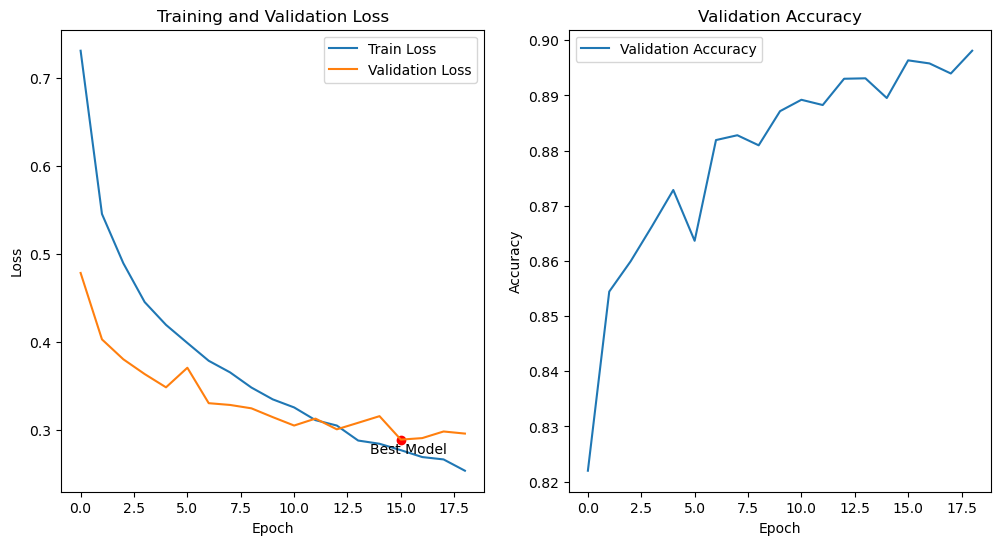

In [10]:
class MyConvNet2(nn.Module):
    def __init__(self):
        super(MyConvNet2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(self.dropout1(x)))
        x = self.fc2(self.dropout2(x))
        return x


model = MyConvNet2()

train_network(model=model,
              best_model_path='MyConvNet2_best_model',
              training_loader=training_loader,
              validation_loader=validation_loader,
              epochs=20,
              early_stopping_patience=3)

MyConvNet2 is the best model among all those tested. I chose it to evaluate the final accuracy on the test dataset.

In [11]:
def evaluate_model(model, data_loader):
    model.eval()
    total_loss, correct = 0, 0
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()

    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = correct / len(data_loader.dataset)
    print(f'Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

# Load the model
model = MyConvNet2()
model.load_state_dict(torch.load('MyConvNet2_best_model.pth'))

# Evaluate on training data (or any other DataLoader)
evaluate_model(model, training_loader)

Loss: 0.1681, Accuracy: 0.9403


Nice :-)

In [12]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load the data
evaluate_data = pd.read_csv('evaluate.csv')

display(evaluate_data.head(10))

,ID,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix1015,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [13]:
def draw_images(data, num_images=40):
    """
    Draws the first `num_images` images contained in `data`.

    Parameters:
    - data: A pandas DataFrame where each row is an image with pixel intensities.
            Assume no label column is present.
    - num_images: The number of images to draw.
    """
    # Drop the 'ID' column and use the result directly
    data_for_visualization = np.array(data.drop('ID', axis=1))
    
    # Number of images to display
    num_images = min(num_images, data_for_visualization.shape[0])

    # Set up the matplotlib figure and axes, based on the number of images
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2.5, 2.5))
    if num_images == 1:
        axes = [axes]  # Make sure axes is iterable for the case of a single image

    for i, ax in enumerate(axes):
        # Reshape the row into 32x32 to get the image
        img = data_for_visualization[i].reshape(32, 32)

        # Display an image
        ax.imshow(img, cmap='gray', interpolation='none')
        ax.axis('off')  # Turn off axes to not show ticks and frame

    plt.tight_layout()
    plt.show()

In [14]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataloader import default_collate

evaluate_source_images = evaluate_data.drop('ID', axis=1).values / 255.0
evaluate_source_id = evaluate_data['ID'].values

# Reshape images to the correct shape
evaluate_source_images = evaluate_source_images.reshape(-1, 1, 32, 32)

# Creating the dataset
eval_dataset = TensorDataset(torch.tensor(evaluate_source_images, dtype=torch.float), torch.tensor(evaluate_source_id, dtype=torch.long))

# DataLoader, ensuring only image data is passed to the model
def my_collate(batch):
    images, ids = zip(*batch)
    ids = [id.item() for id in ids]  # Convert tensor IDs to integers here
    return default_collate(images), ids

evaluation_loader = DataLoader(eval_dataset, batch_size=64, shuffle=False, collate_fn=my_collate)

def predict(model, data_loader):
    model.eval()
    predictions = []
    ids_list = []
    with torch.no_grad():
        for inputs, ids in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.tolist())
            ids_list.extend(ids)
    return ids_list, predictions

model = MyConvNet2()
model.load_state_dict(torch.load('MyConvNet2_best_model.pth'))

ids, predictions = predict(model, evaluation_loader)

if predictions:
    results_df = pd.DataFrame({
        'ID': ids,
        'Prediction': predictions
    })
    results_df.to_csv('results.csv', index=False)
    print("Results saved to results.csv")
else:
    print("No predictions were made.")

Results saved to results.csv


,prediction
ID,
0,9
1,4
2,1
3,7
4,1
5,9
6,1
7,0
8,0


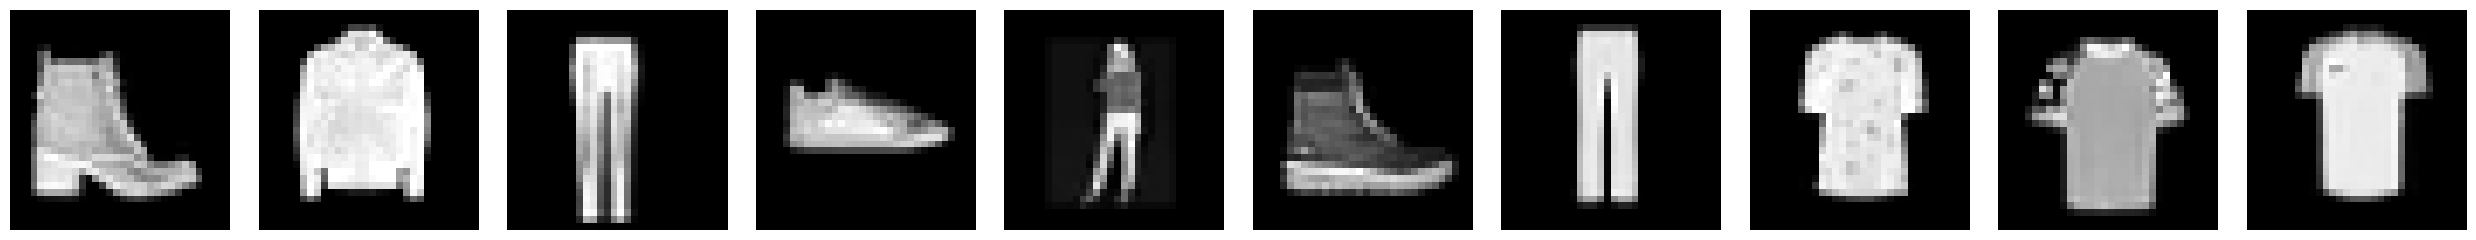

In [15]:
df_results = pd.DataFrame({'ID': ids, 'prediction': predictions})
df_results.set_index('ID', inplace=True)
display(df_results.head(10))
draw_images(evaluate_data, num_images=10)

A brief look at the results suggests that the predictions are truthworthy.